In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV, learning_curve, cross_validate
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
wine = pd.read_csv('data/wine.csv',sep=';')
bins = (2, 6.5, 8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins,labels=group_names)
wine = wine.dropna()
wine_label_quality = LabelEncoder()
wine['quality'] = wine_label_quality.fit_transform(wine['quality'])
dataset = 'Wine'
X = wine.drop('quality',axis=1)
y = wine['quality']

X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

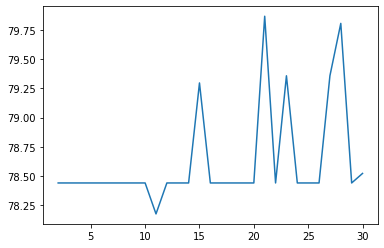

In [3]:
N = np.arange(2,31,1)
acc_array=[]
for n in N:
    kmeans = KMeans(n_clusters=n,
                    n_init=50,
                    max_iter=1000,
                    random_state=44, 
                    n_jobs=-2).fit(X)
    labels = kmeans.labels_
    labels=labels.reshape(-1,1)
    nn_clf = MLPClassifier(hidden_layer_sizes=(85,), learning_rate_init=0.01)
    nn_clf.fit(labels, y)
    nn_y_pred = nn_clf.predict(labels)
    nn_acc = accuracy_score(y, nn_y_pred)*100
    acc_array.append(nn_acc)
    
plt.plot(N, acc_array)
plt.show()

Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.44%
Tuned Accuracy: 78.52%
Tuned Accuracy: 78.52%


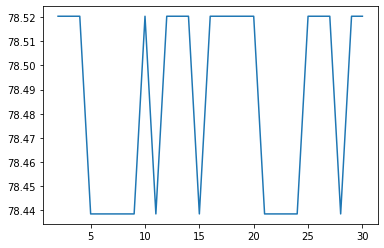

In [4]:
acc_array=[]
for n in N:
    gmm = GaussianMixture(n_components=10,
                          max_iter=100,
                          random_state=44, 
                          n_init=5).fit(X)
    label = gmm.predict(X)
    label = label.reshape(-1,1)
    nn_clf = MLPClassifier(hidden_layer_sizes=(85,), learning_rate_init=0.01)
    nn_clf.fit(labels, y)
    nn_y_pred = nn_clf.predict(labels)
    nn_acc = accuracy_score(y, nn_y_pred)*100
    print("Tuned Accuracy: %.2f%%"%nn_acc)
    acc_array.append(nn_acc)
plt.plot(N, acc_array)
plt.show()